In [2]:
import sys
sys.path.append("/home/coffee/QkidsAutomation")
from qkids.Models.ScheduleStatus import ScheduleStatus

import matplotlib.pyplot as plt
import datetime
import pandas as pd
from qkids.DataFarm import get_teacher_timetable
from qkids import Week

In [70]:
def show_rate(df):
    fig = plt.figure(0,figsize=(60, 60))
    title = df.iloc[0, 3] 
    r1r = df.room_1_num / df.room_1_teacher_num
    ax = fig.add_subplot(3,1,1)
    ax.set_title(title)
    ax.plot(r1r.index, r1r.values, label = 'room 1' )
    close_tm = close_index(r1r)
    ax.text(close_tm, 0.5, get_time_delta(close_tm, title))
    ax.vlines(close_tm, 0, 1, transform=ax.get_xaxis_transform(), colors='r')
    ax.legend()
    
    r2r = df.room_2_num / df.room_2_teacher_num *2
    ax = fig.add_subplot(3,1,2)
    ax.set_title(title)
    ax.plot(r2r.index, r2r.values, label = 'room 2' )
    close_tm = close_index(r2r)
    ax.text(close_tm, 0.5, get_time_delta(close_tm, title))
    ax.vlines(close_tm, 0, 1, transform=ax.get_xaxis_transform(), colors='r')
    ax.legend()
    
    r4r = df.room_4_num / df.room_4_teacher_num
    ax = fig.add_subplot(3,1,3)
    ax.set_title(title)
    ax.plot(r4r.index, r4r.values, label = 'room 4' )
    close_tm = close_index(r4r)
    ax.text(close_tm, 0.5, get_time_delta(close_tm, title))
    ax.vlines(close_tm, 0, 1, transform=ax.get_xaxis_transform(), colors='r')
    ax.legend()
    plt.show()
    
def close_index(ser):
    last = ser.iloc[-1]
    for k, v in ser.items():
        if v > last:
            return k
        
def get_time_delta(f, t):
    return str(pd.Timestamp(t) - f)

In [3]:
ss = ScheduleStatus()

In [8]:
t = datetime.datetime(2020,2,20, 9, 50)

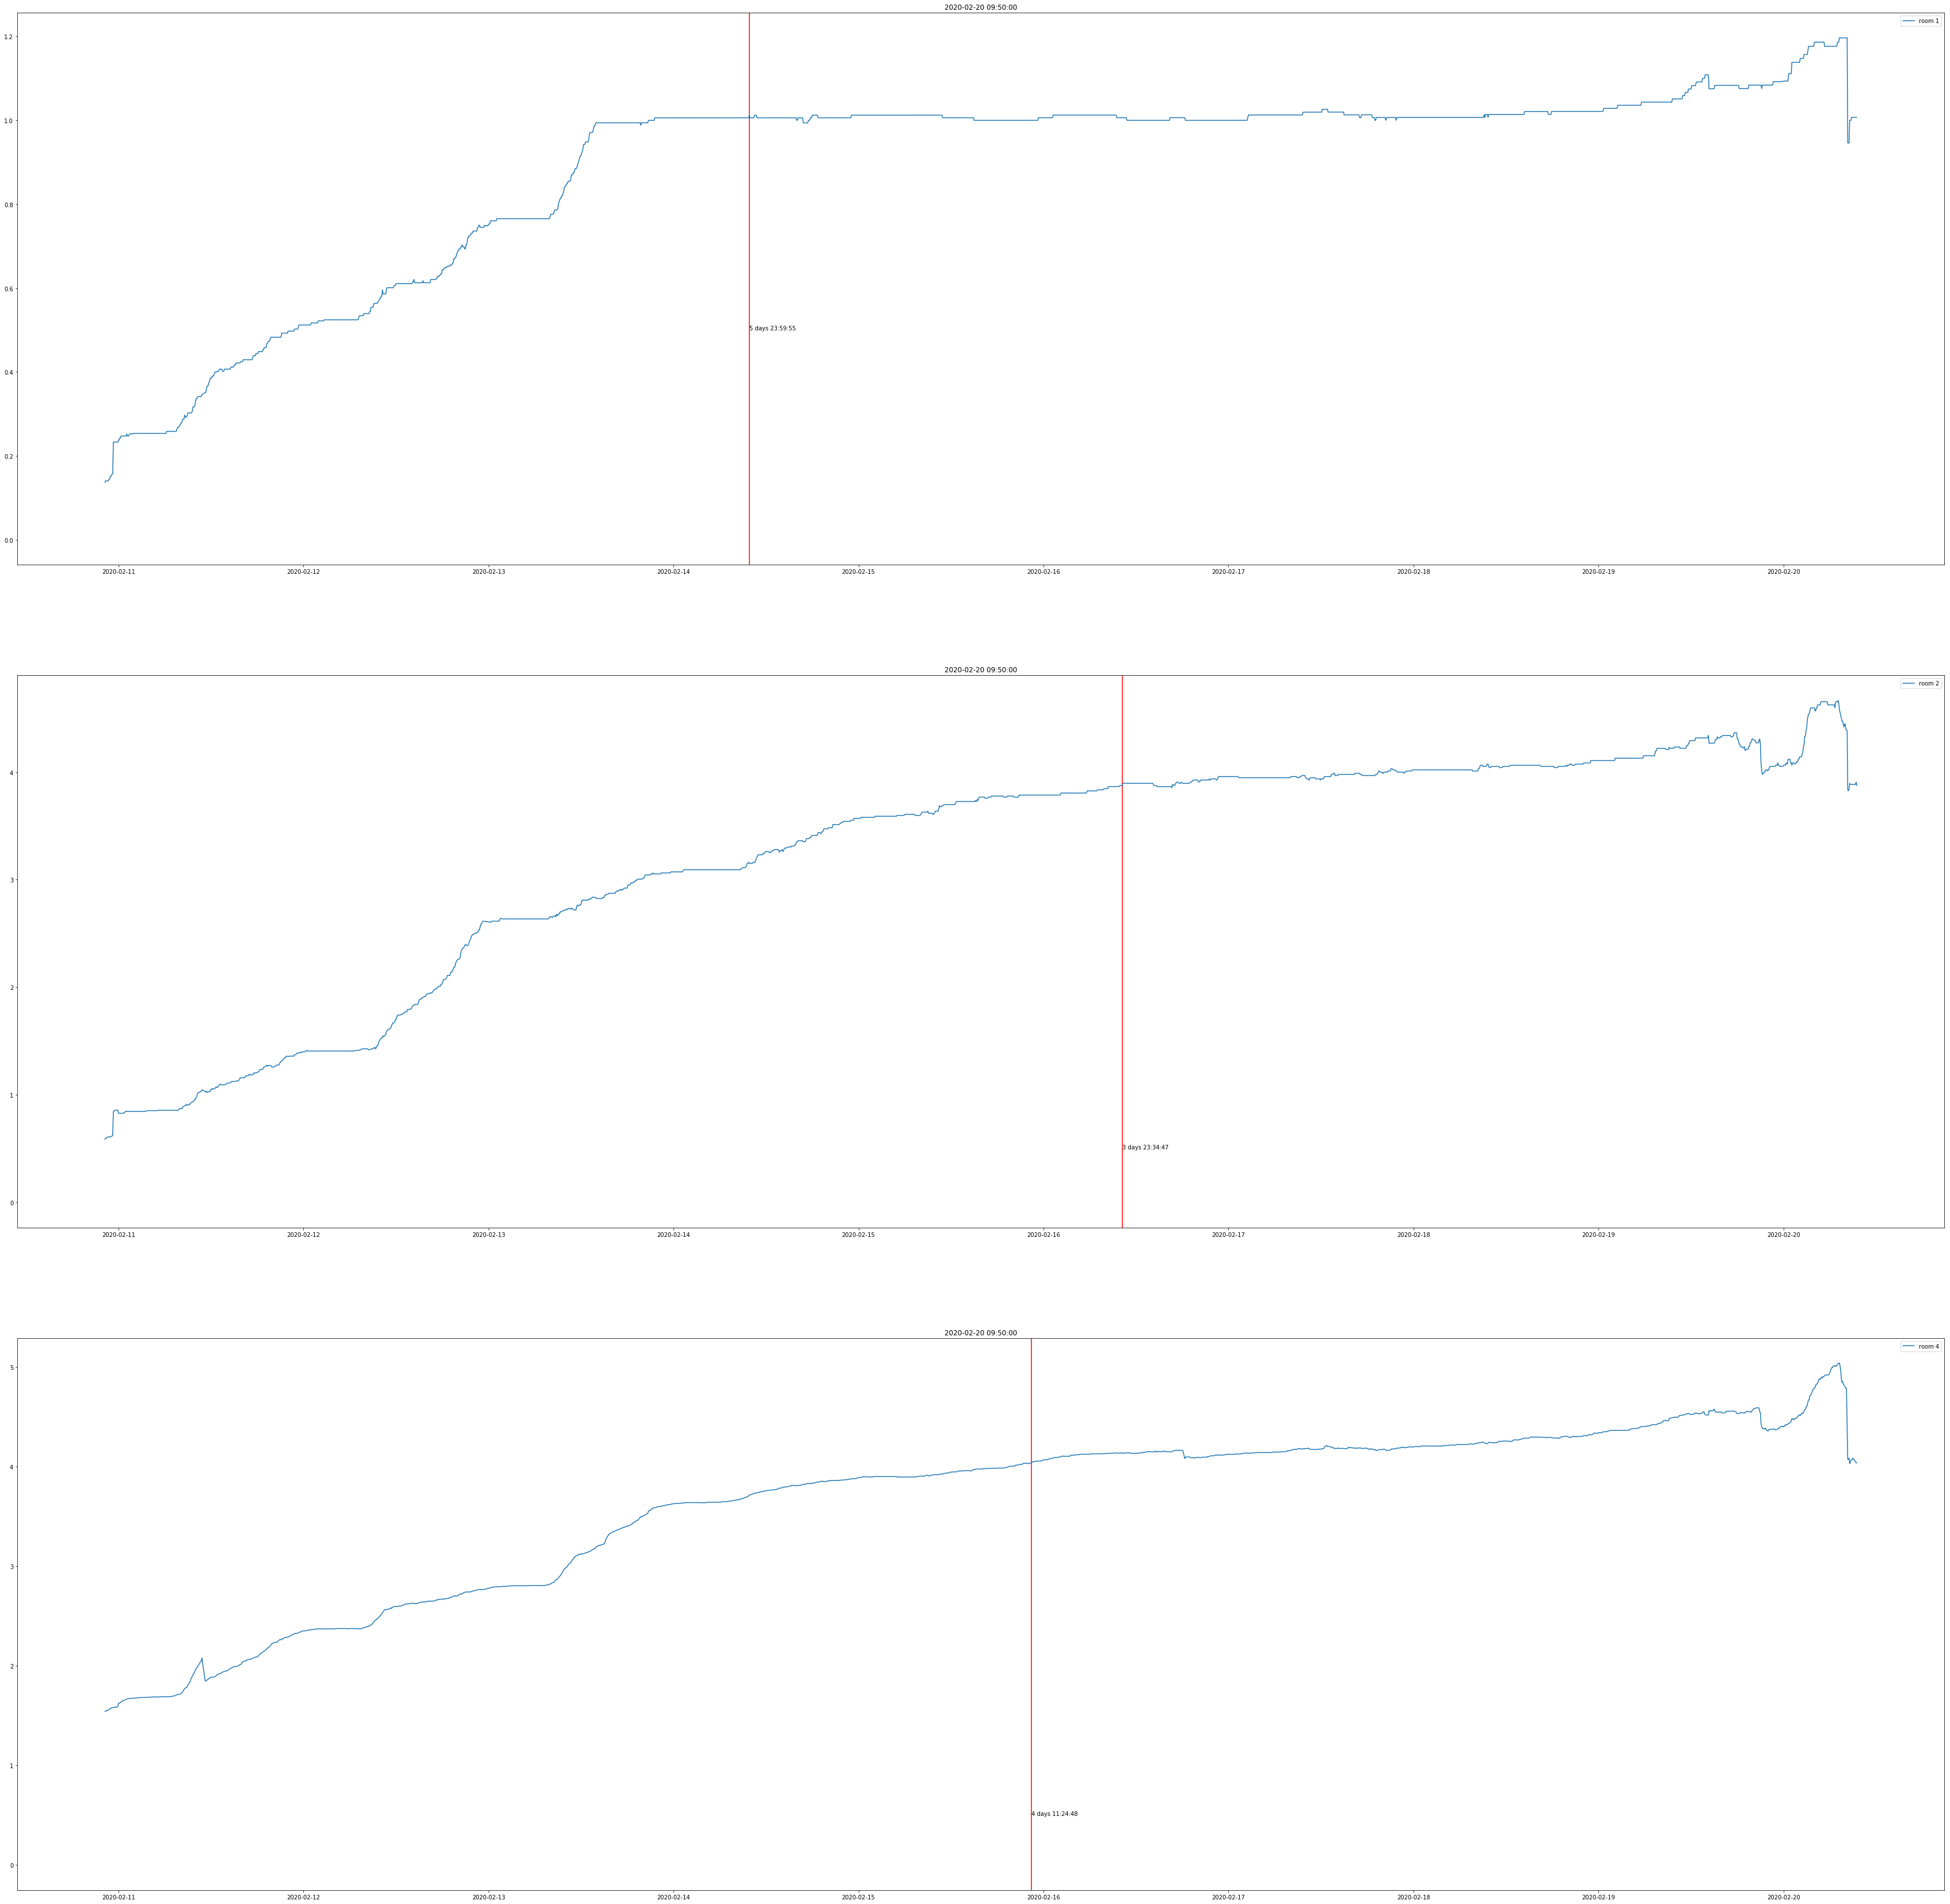

In [61]:
show_rate(df)

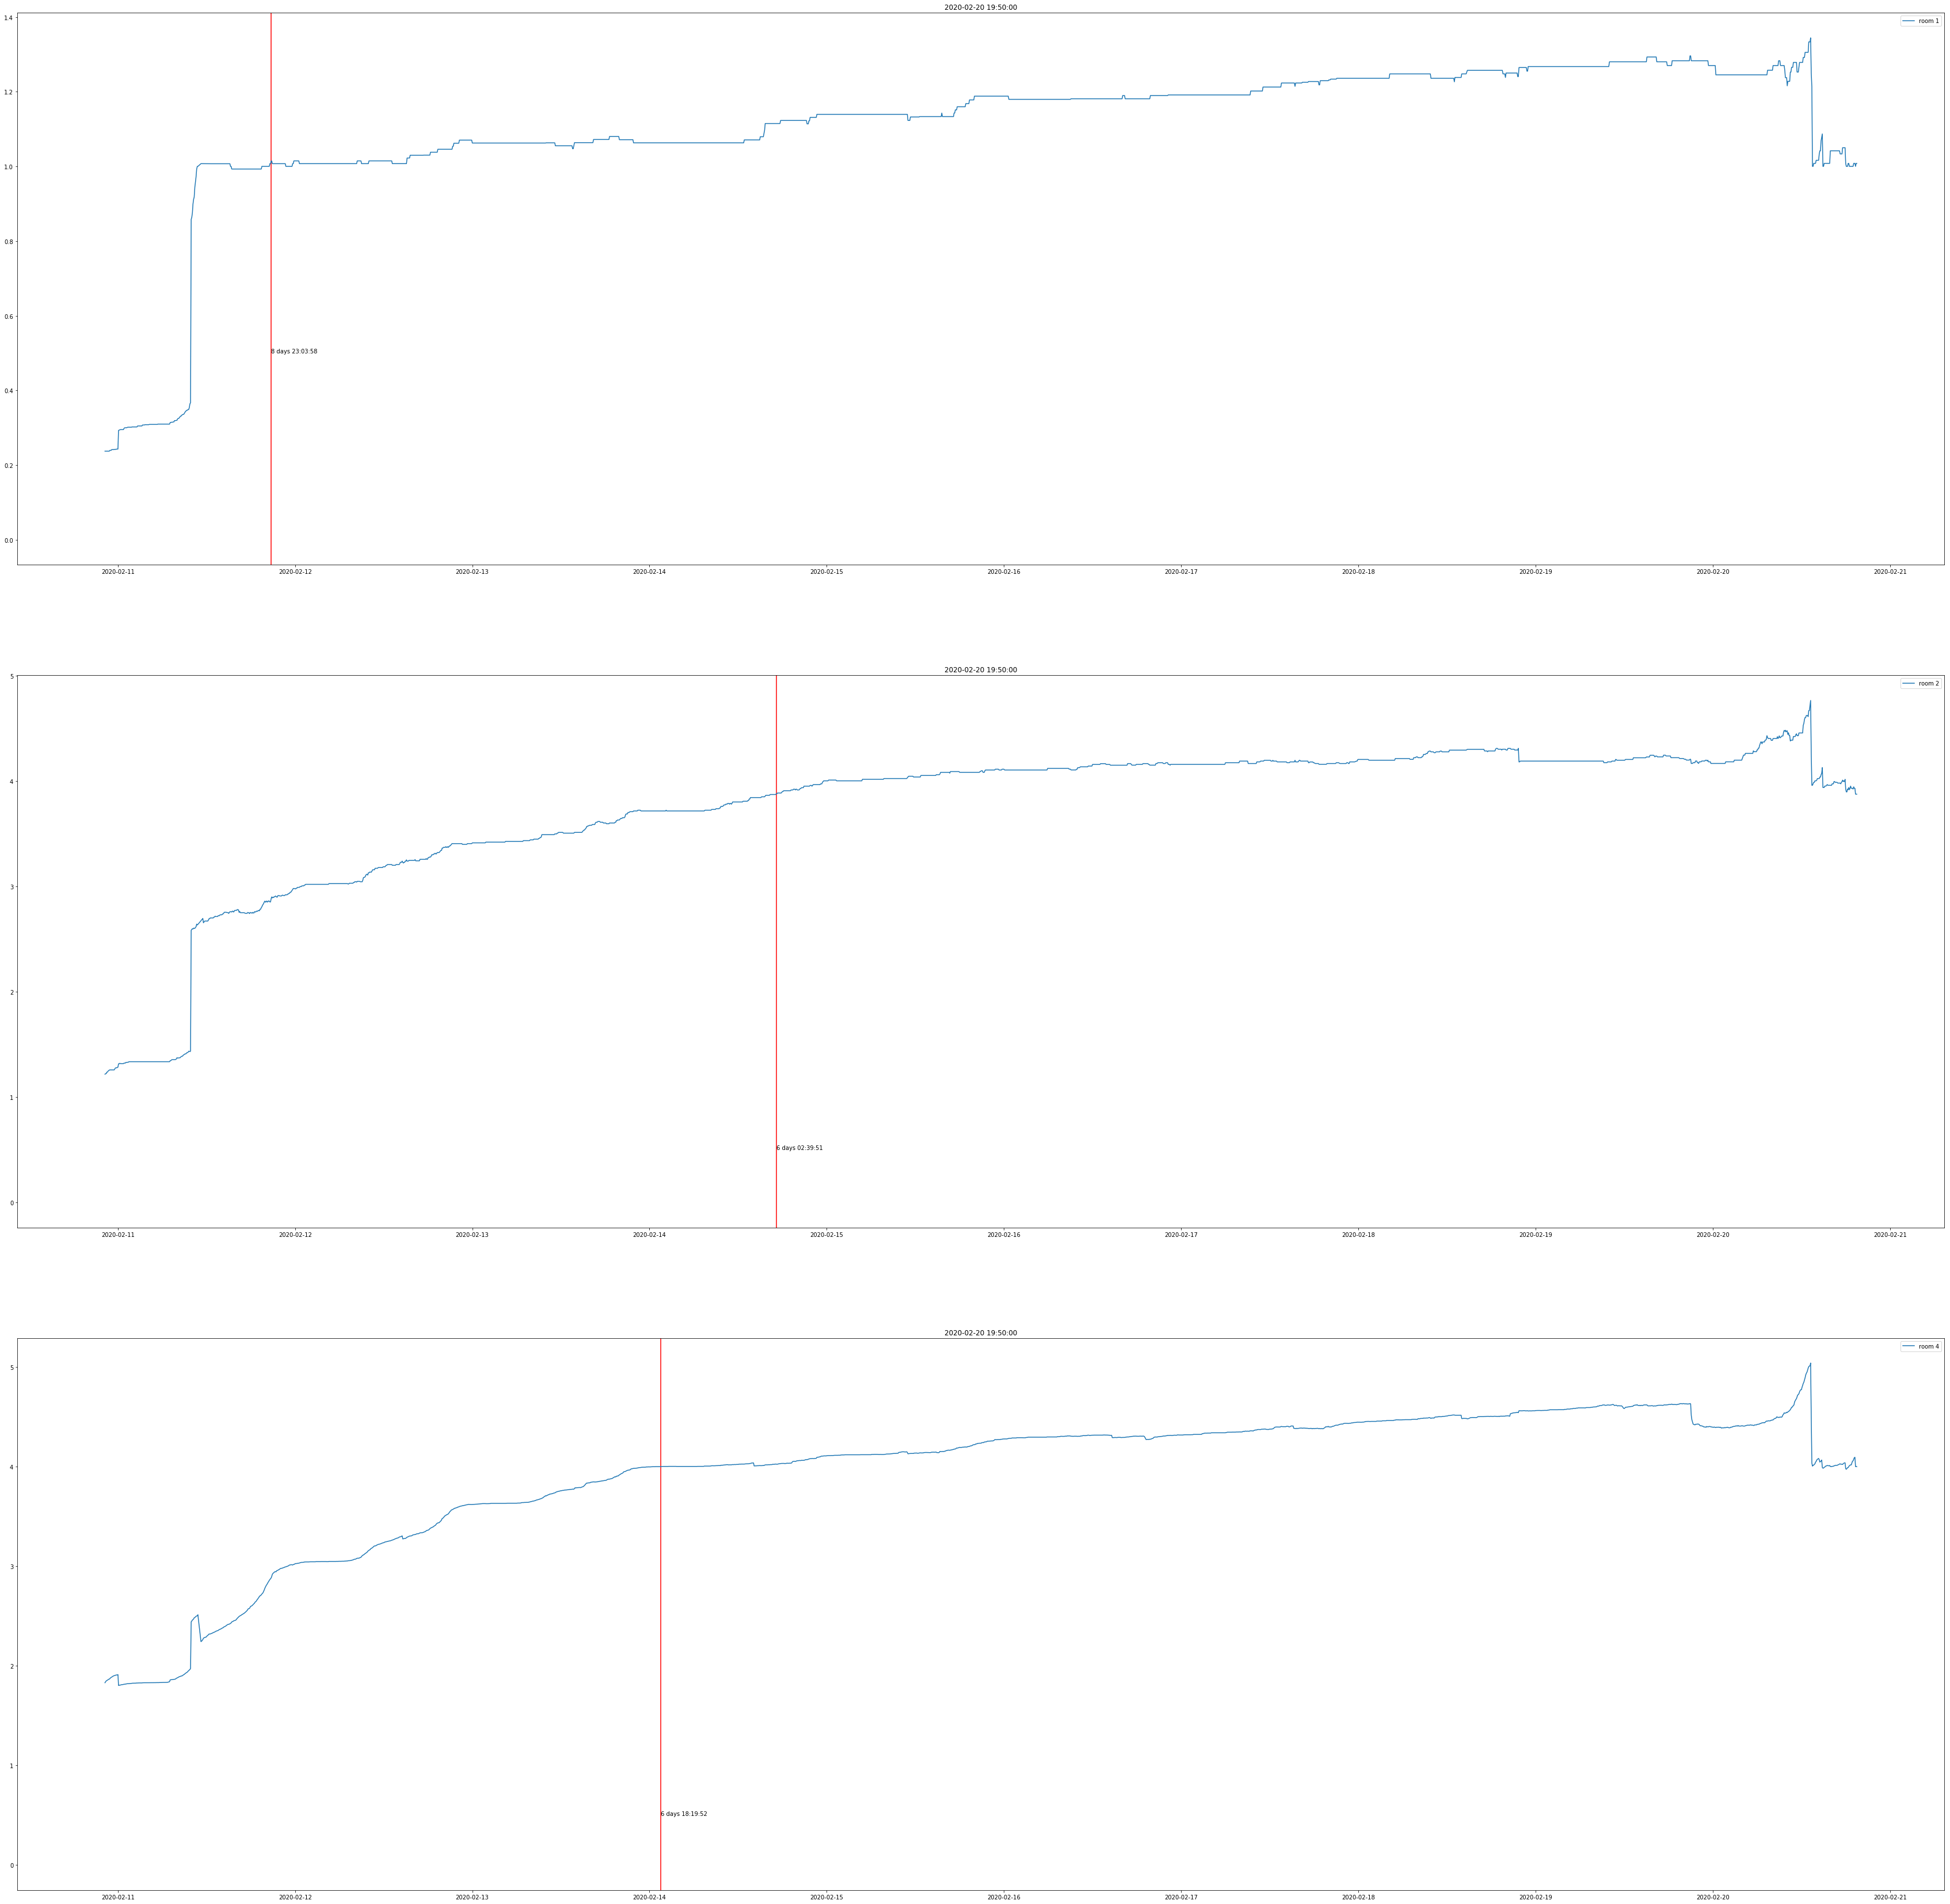

In [76]:
t = datetime.datetime(2020,2,20, 19, 50)
df = ss.query(t.timestamp())
df.index = [datetime.datetime.fromtimestamp(tm) for tm in df.create_at]
show_rate(df)

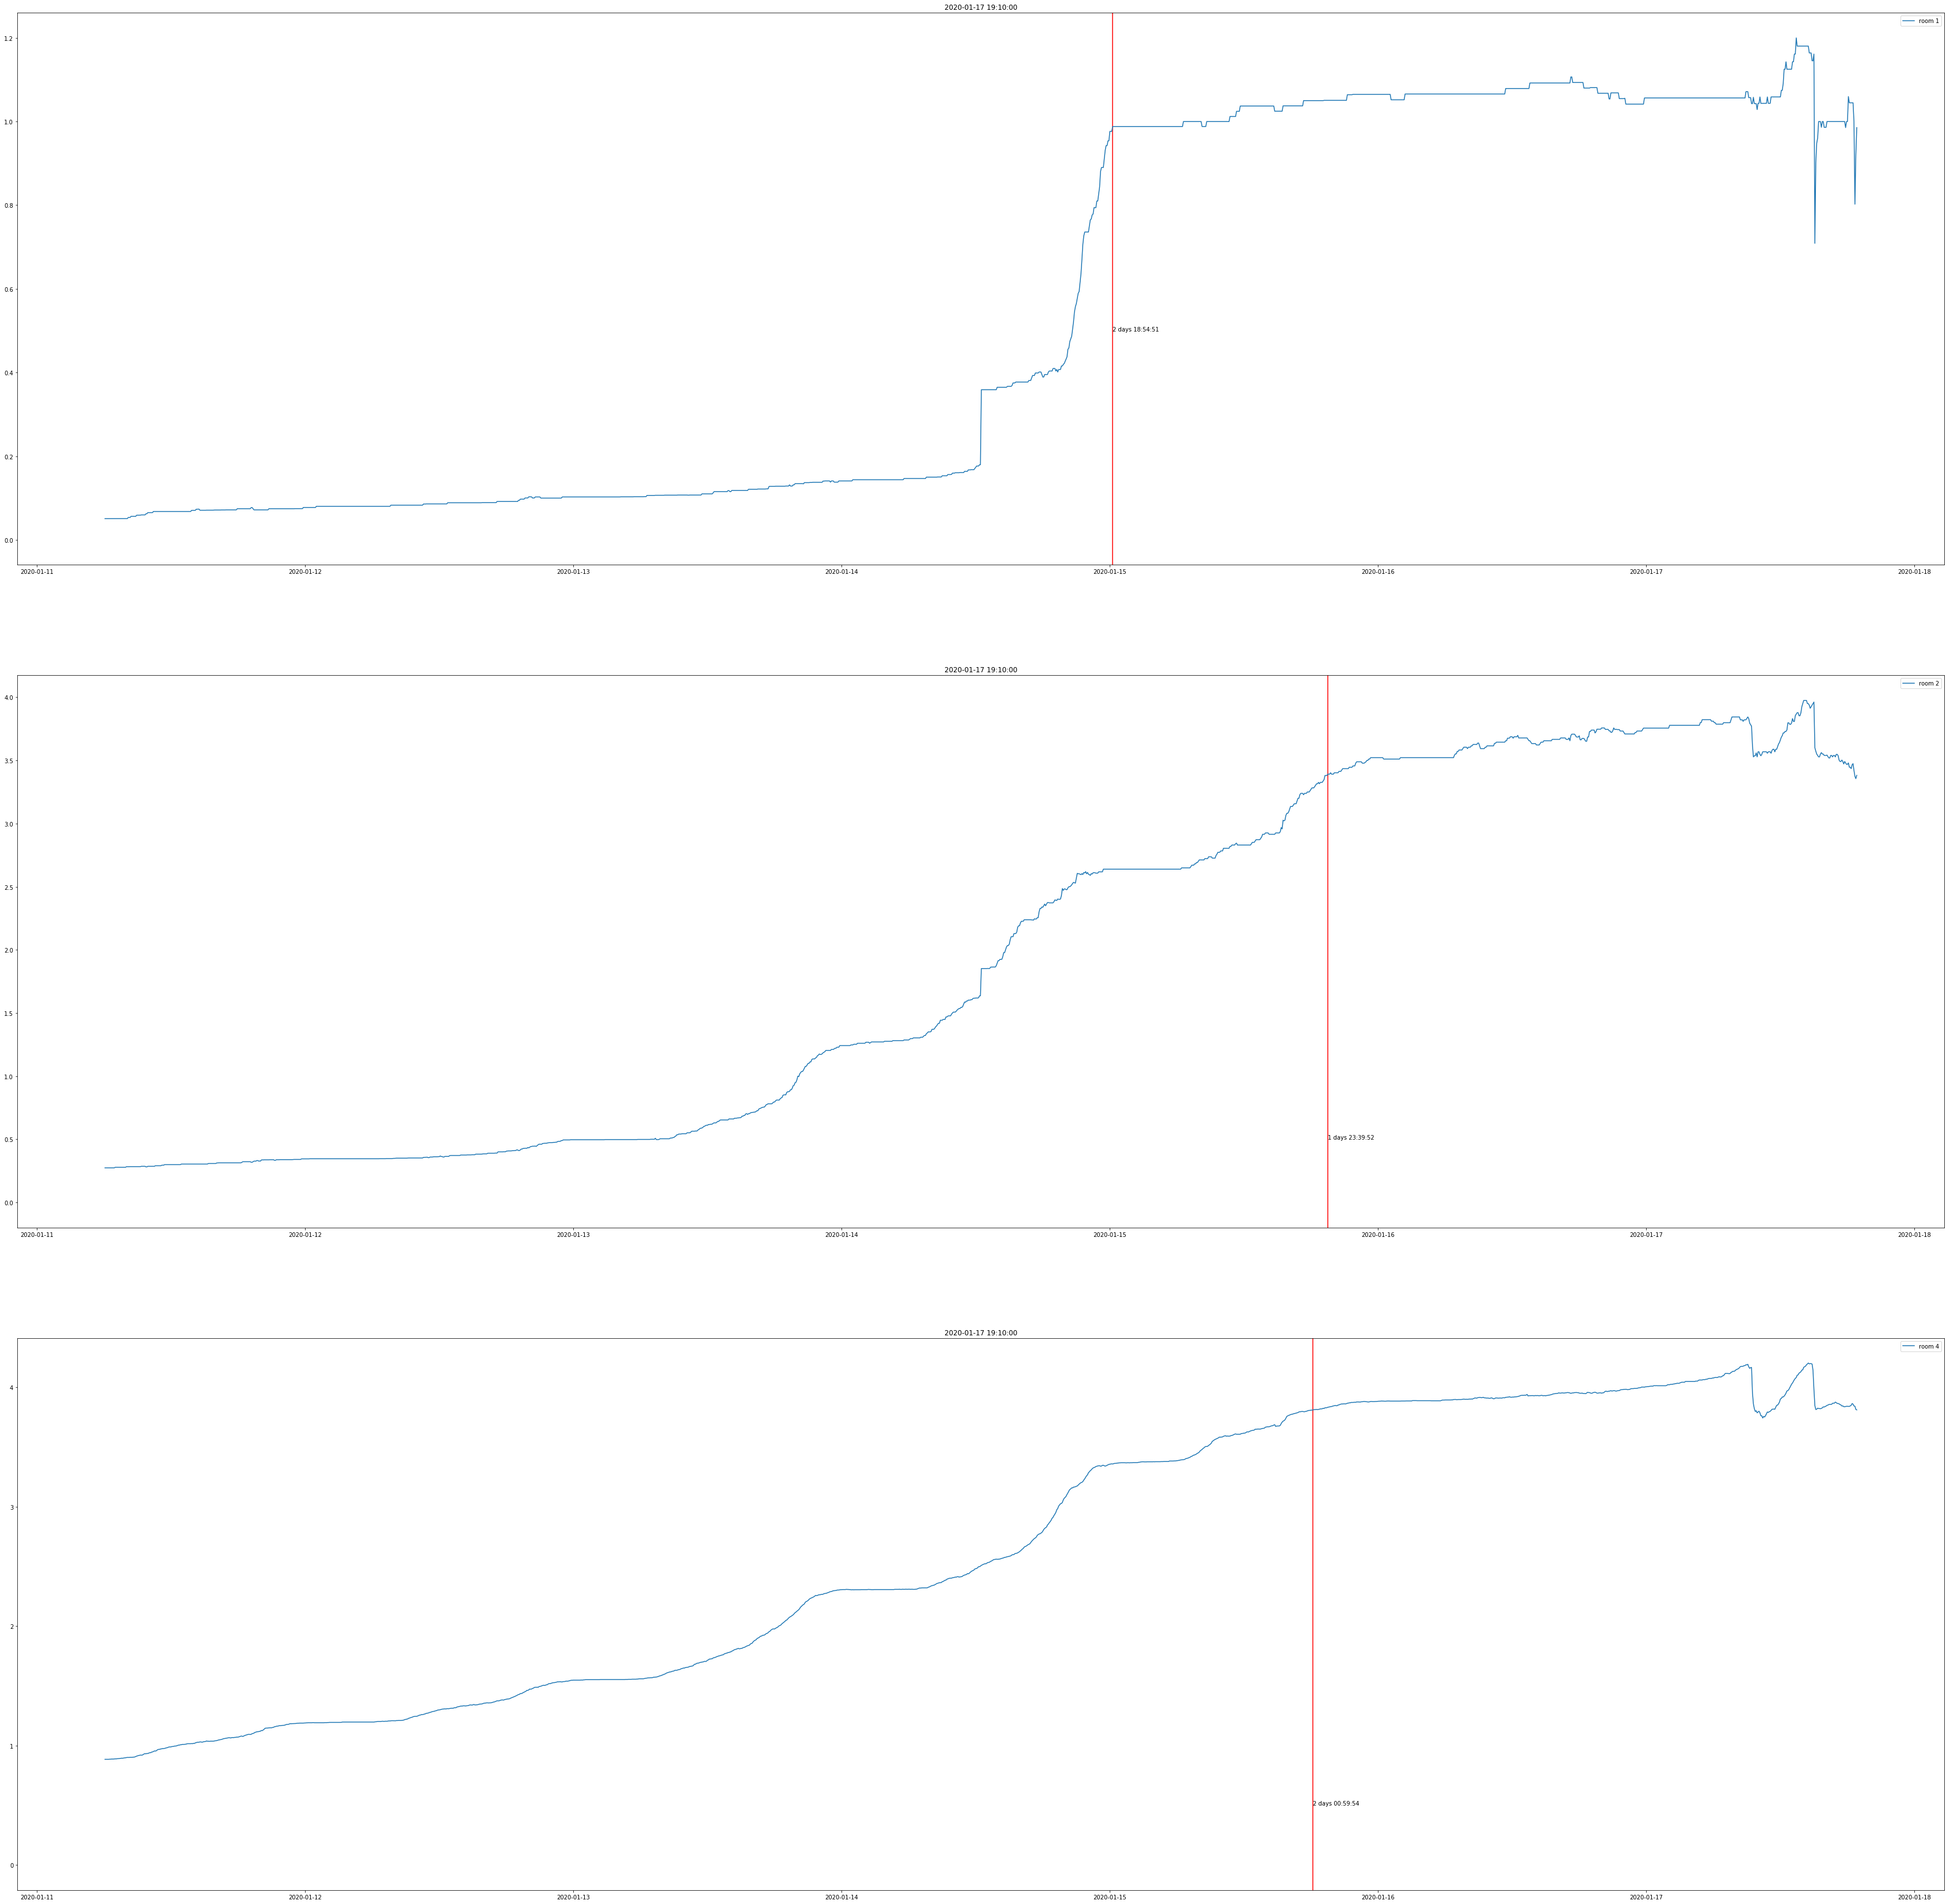

In [81]:
t = datetime.datetime(2020,1,17, 19, 10)
df = ss.query(t.timestamp())
df.index = [datetime.datetime.fromtimestamp(tm) for tm in df.create_at]
show_rate(df)

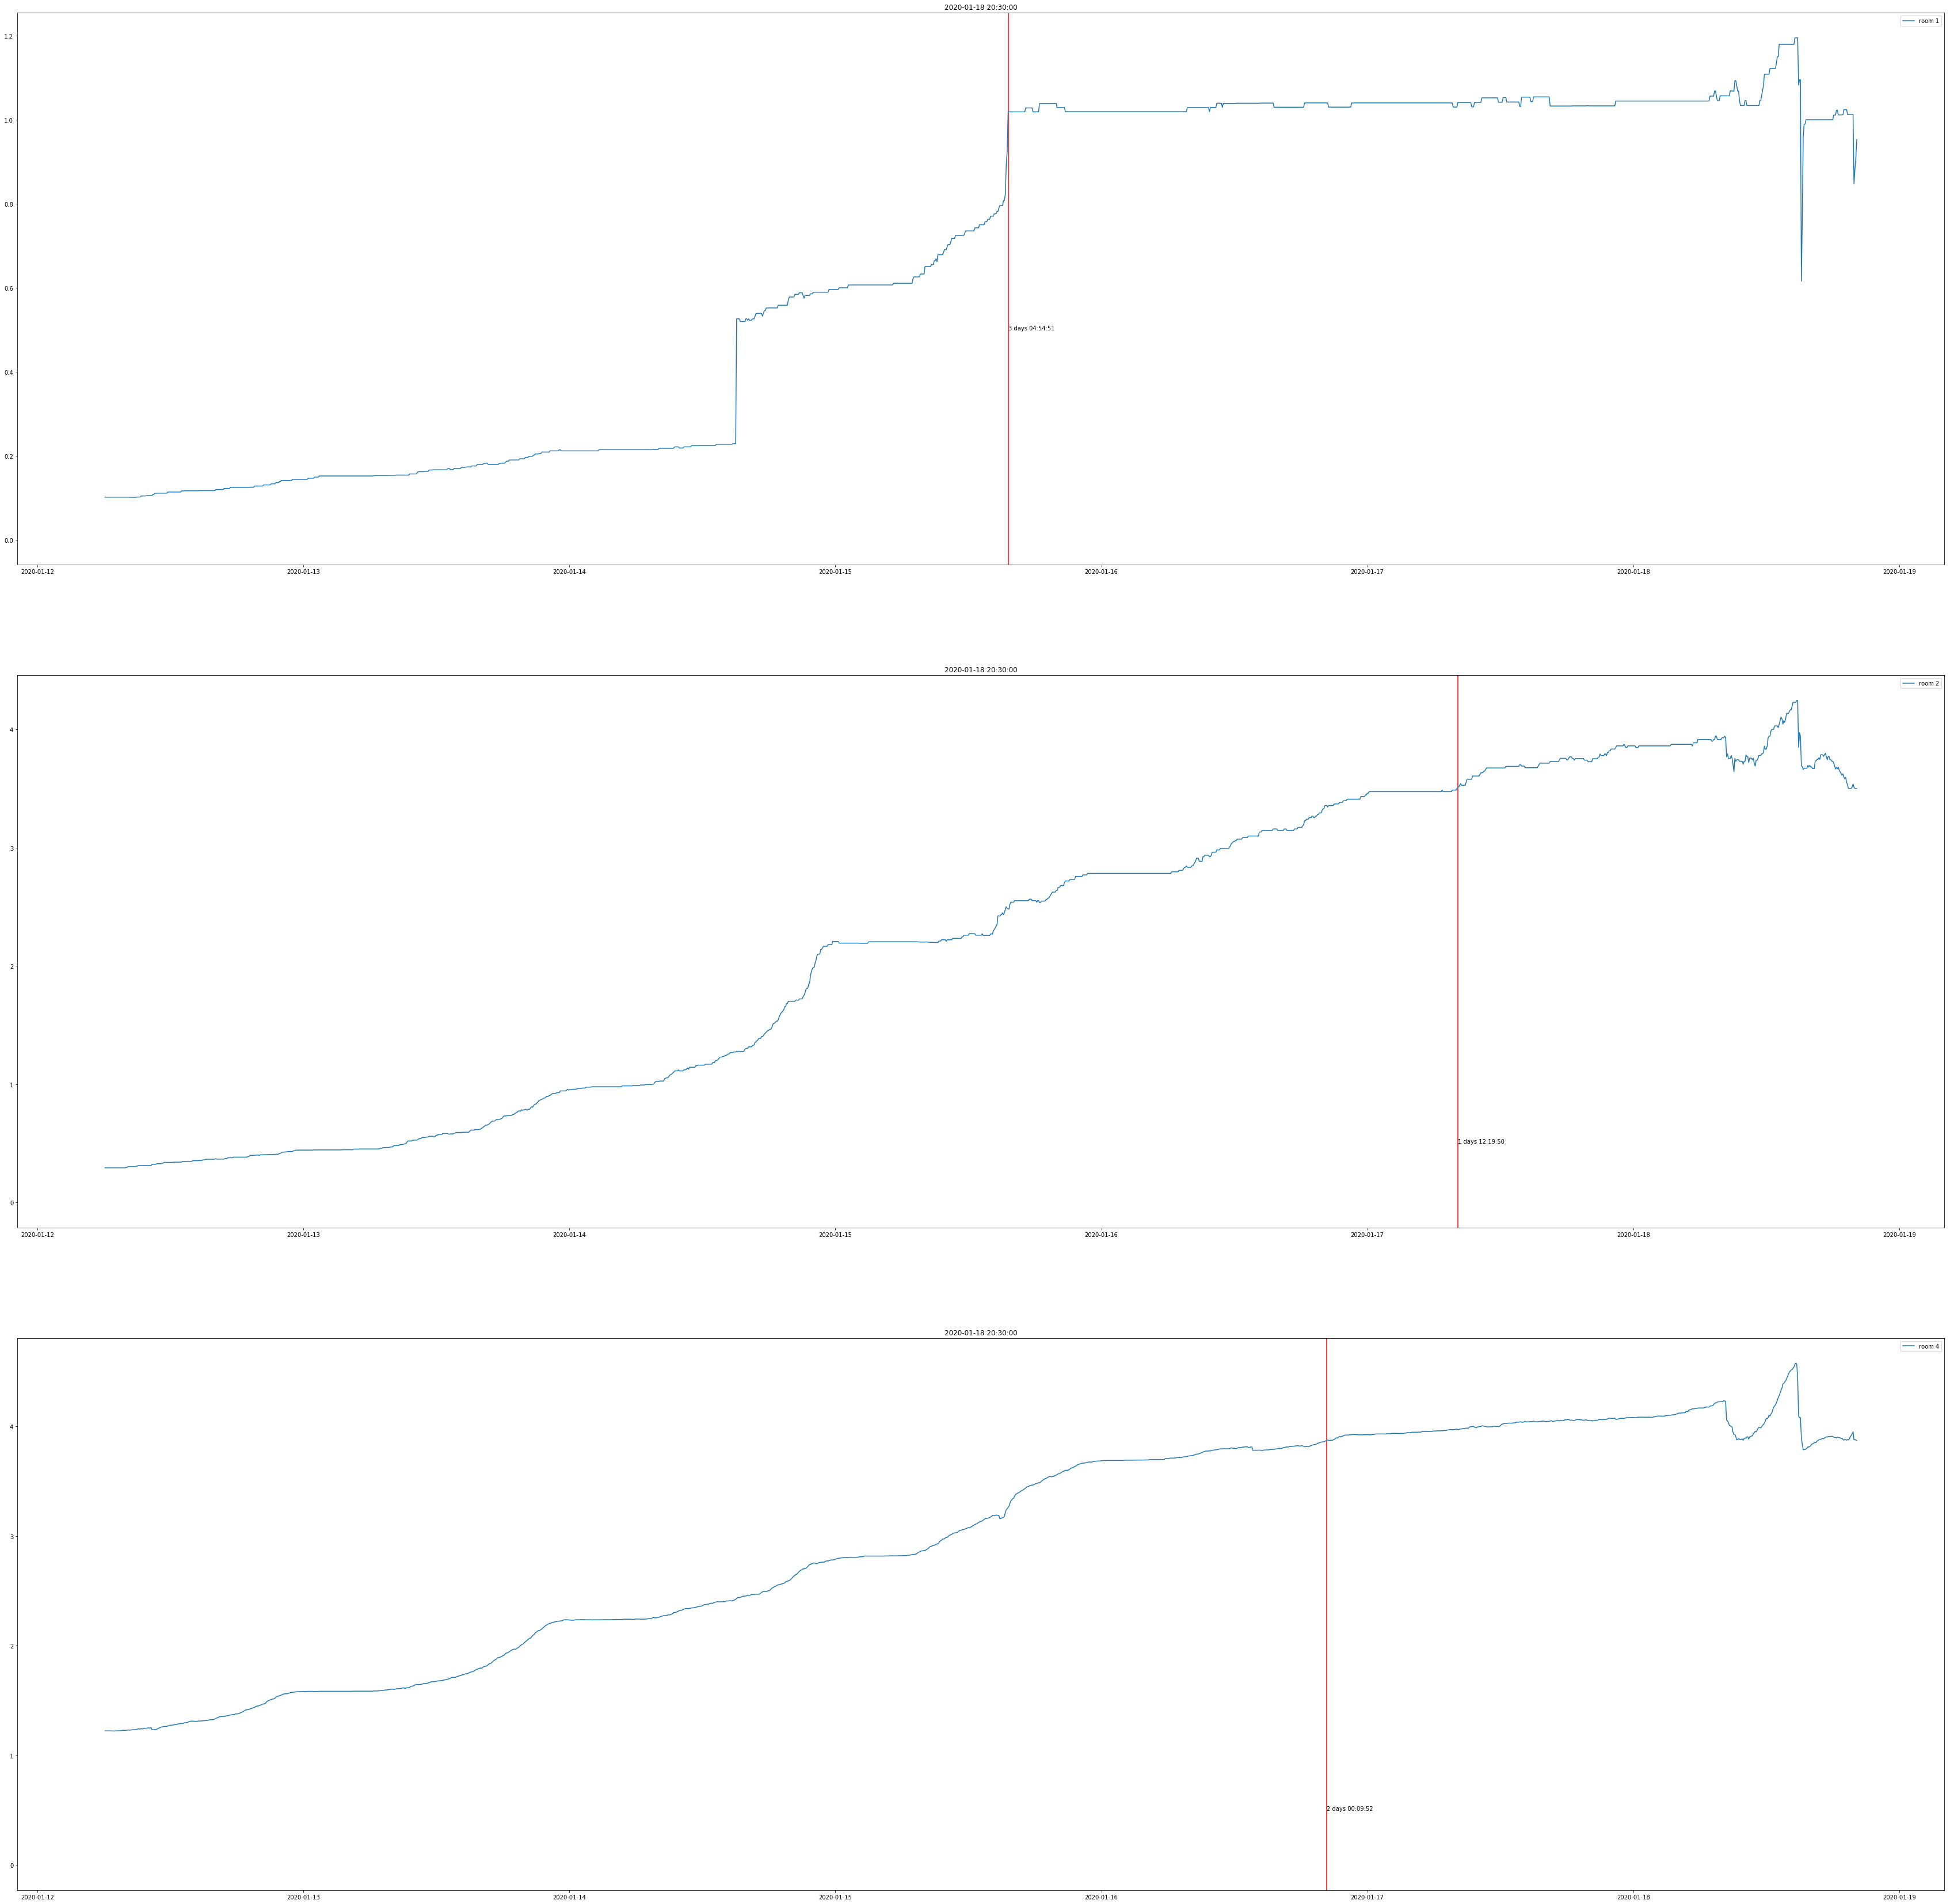

In [82]:
t = datetime.datetime(2020,1,18, 20,30)
df = ss.query(t.timestamp())
df.index = [datetime.datetime.fromtimestamp(tm) for tm in df.create_at]
show_rate(df)

## 检查各时间点请假率最高的老师

In [50]:
def get_teacher_timetable_weekly(week):
    tt = get_teacher_timetable(week)
    tt.columns = [c.strftime("%w_%H:%M") for c in tt.columns]
    tt.loc[:, 'week'] = str(week)
    return tt

In [51]:
week = Week(isoday='2020-01-01')
df = None
while str(week) < '202009':
    print(week)
    if df is None:
        df = get_teacher_timetable_weekly(week)
    else:
        output = get_teacher_timetable_weekly(week)
        df = pd.concat([df, output], axis=0)
    week = week.get_next_week()
df = df.fillna(0)

202001
202002
202003
202004
202005
202006
202007
202008


In [52]:
def get_rate(s):
    a = s.isin([4,9]).sum()
    b = (s == 3).sum()
    if a + b > 0:
        return a / (a +b)
    else:
        return 0

In [53]:
teacher_absent_rate = None
output = {}
for teacher_id,data in df.groupby(level=0):
    tep = data.drop('week', axis=1).apply(get_rate)
    output[teacher_id] = tep

teacher_absent_rate = pd.DataFrame(output)

In [57]:
teacher_absent_rate = teacher_absent_rate.drop(1, axis=1)

In [71]:
teacher_absent_rate.iloc[0].sort_values(ascending=False).to_dict()

{414694: 1.0,
 109446: 1.0,
 235281: 1.0,
 4022: 1.0,
 321716: 1.0,
 336548: 1.0,
 336455: 1.0,
 234171: 1.0,
 112430: 1.0,
 121719: 1.0,
 233870: 1.0,
 3714: 1.0,
 104009: 1.0,
 266317: 1.0,
 345219: 1.0,
 128654: 1.0,
 178446: 1.0,
 264092: 1.0,
 109386: 1.0,
 107782: 1.0,
 298185: 1.0,
 122954: 1.0,
 105629: 1.0,
 344924: 1.0,
 177601: 1.0,
 355572: 1.0,
 416688: 1.0,
 112356: 1.0,
 236734: 1.0,
 315212: 1.0,
 100091: 1.0,
 109314: 1.0,
 4405: 1.0,
 233317: 1.0,
 100487: 1.0,
 3525: 1.0,
 185001: 1.0,
 112531: 1.0,
 389456: 1.0,
 305438: 1.0,
 186674: 1.0,
 346191: 1.0,
 229557: 1.0,
 129142: 1.0,
 112502: 1.0,
 109808: 1.0,
 111289: 1.0,
 314395: 1.0,
 105490: 1.0,
 324130: 1.0,
 100615: 1.0,
 142592: 1.0,
 116107: 1.0,
 345596: 1.0,
 184192: 1.0,
 354612: 1.0,
 183696: 1.0,
 231940: 1.0,
 367564: 1.0,
 314681: 1.0,
 323296: 1.0,
 111355: 1.0,
 3364: 1.0,
 335575: 1.0,
 289030: 1.0,
 335584: 1.0,
 323174: 1.0,
 127979: 1.0,
 107967: 1.0,
 4459: 1.0,
 251013: 1.0,
 318332: 1.0,
 356

In [72]:
teacher_absent_rate.idxmax(axis=1)

1_07:50    1690
1_08:30    1938
1_09:10    1753
1_09:50    1956
1_10:30    1753
1_11:10     526
1_11:50     229
1_13:30    2160
1_14:10    2160
1_14:50    2160
1_15:30    2160
1_16:10    2160
1_17:50     149
1_18:30     149
1_19:10     967
1_19:50     165
1_20:30     526
2_07:50     387
2_08:30     149
2_09:10      72
2_09:50     387
2_10:30    2392
2_11:10     780
2_11:50     835
2_13:30    2160
2_14:10    2160
2_14:50    2160
2_15:30    2160
2_16:10    2160
2_17:50     149
           ... 
6_10:30    1086
6_11:10     503
6_11:50     542
6_13:30     526
6_14:10     526
6_14:50    1938
6_15:30    1747
6_16:10     428
6_17:50    1086
6_18:30     208
6_19:10     387
6_19:50     387
6_20:30     387
0_07:50    1690
0_08:30     149
0_09:10     149
0_09:50      81
0_10:30     661
0_11:10      81
0_11:50     780
0_13:30    1747
0_14:10    1747
0_14:50    1747
0_15:30    1747
0_16:10    1747
0_17:50     526
0_18:30     661
0_19:10      59
0_19:50      59
0_20:30     595
Length: 119, dtype: int6

In [73]:
teacher_absent_rate.to_pickle('teacher_absent_rate_each_slot.pkl')

In [74]:
teacher_absent_rate.mean(axis=1)

1_07:50    0.067467
1_08:30    0.116439
1_09:10    0.121037
1_09:50    0.120592
1_10:30    0.113938
1_11:10    0.108057
1_11:50    0.057430
1_13:30    0.032595
1_14:10    0.032285
1_14:50    0.031457
1_15:30    0.032285
1_16:10    0.033113
1_17:50    0.059948
1_18:30    0.162799
1_19:10    0.195705
1_19:50    0.202859
1_20:30    0.198659
2_07:50    0.063604
2_08:30    0.111869
2_09:10    0.124930
2_09:50    0.119249
2_10:30    0.110600
2_11:10    0.108644
2_11:50    0.061914
2_13:30    0.028180
2_14:10    0.029111
2_14:50    0.029939
2_15:30    0.030422
2_16:10    0.029974
2_17:50    0.060292
             ...   
6_10:30    0.206373
6_11:10    0.191270
6_11:50    0.084127
6_13:30    0.043288
6_14:10    0.041184
6_14:50    0.040356
6_15:30    0.039321
6_16:10    0.041391
6_17:50    0.070295
6_18:30    0.174125
6_19:10    0.206966
6_19:50    0.221765
6_20:30    0.232171
0_07:50    0.085955
0_08:30    0.185862
0_09:10    0.196839
0_09:50    0.199402
0_10:30    0.193296
0_11:10    0.187309
